# CS3400 - Final Project
# Naive Bayes
# Ryan, Ethan, and Vincent
---
We will start by importing the data set and splitting the data into features and responses.

In [51]:
import numpy as np
import pandas as pd
data = np.loadtxt(fname="heart_v2.csv", delimiter=',', skiprows=1)
df = pd.read_csv("heart_v2.csv")
features = data[:,0:4]
responses = data[:,4]
df.head()


,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


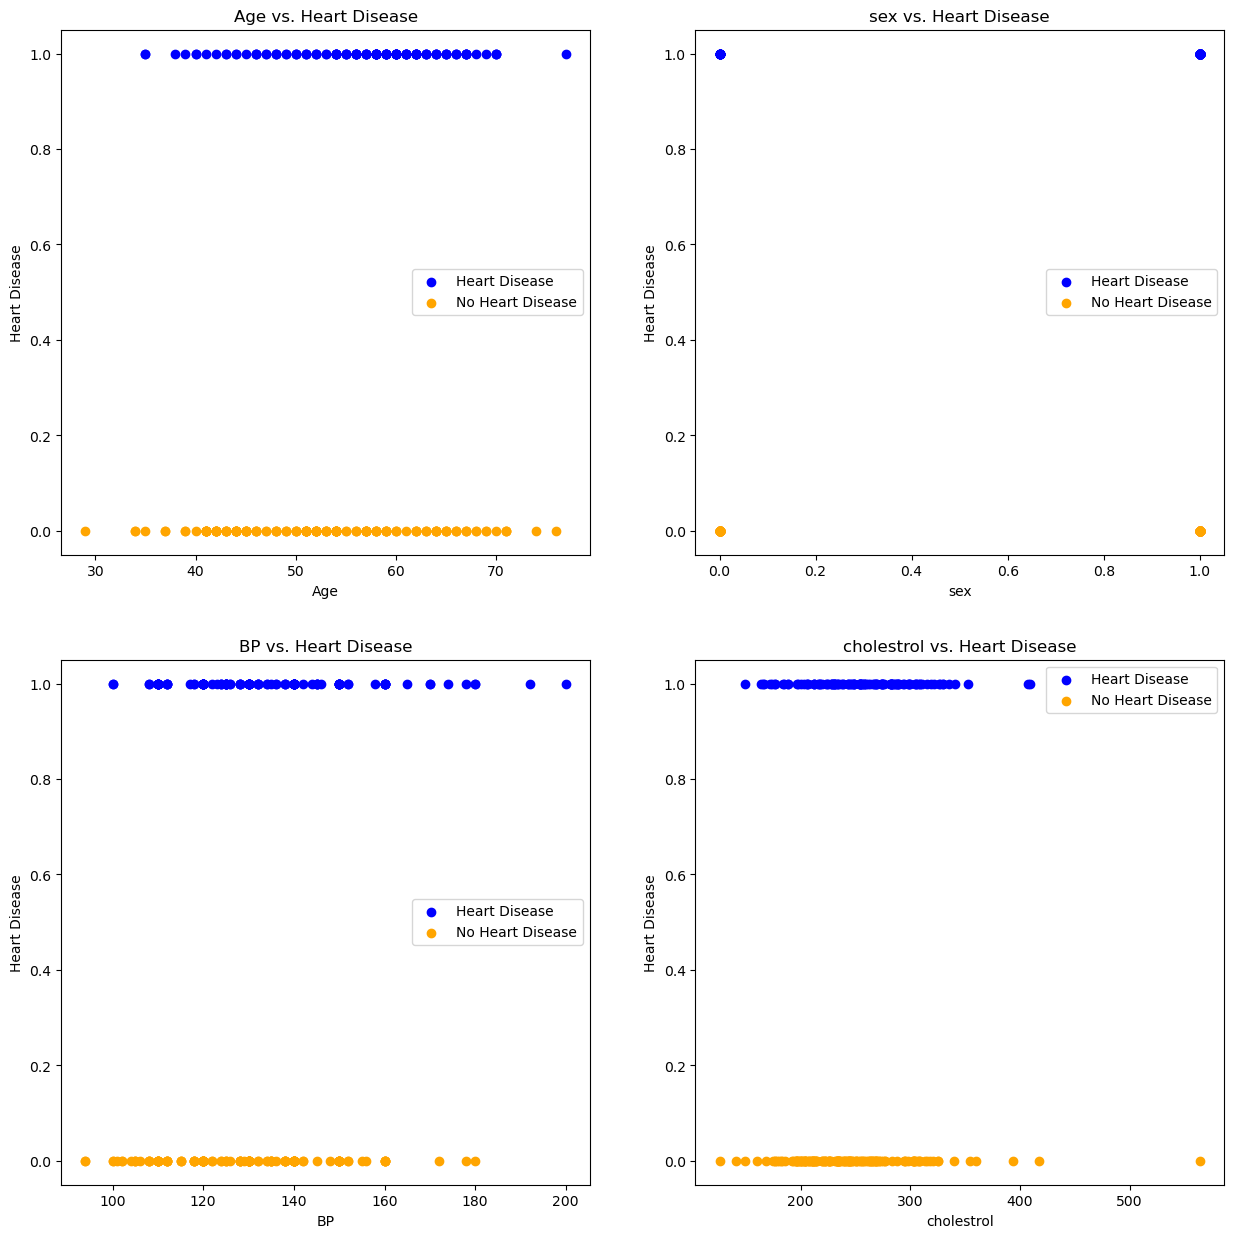

In [52]:
import matplotlib.pyplot as plt
heart_disease_true = df[df["heart disease"] == 1]
heart_disease_false = df[df["heart disease"] == 0]
heart_disease = heart_disease_true["heart disease"]
no_heart_disease = heart_disease_false["heart disease"]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))


def create_plot(row, col, input_true, input_false, label, x_label, y_label):
    ax[row][col].scatter(input_true, heart_disease, color="blue", label=label)
    ax[row][col].scatter(input_false, no_heart_disease, color="orange", label="No " + label)
    ax[row][col].set_title("" + x_label + " vs. " + y_label)
    ax[row][col].set_xlabel(x_label)
    ax[row][col].set_ylabel(y_label)
    ax[row][col].legend()


create_plot(0, 0, heart_disease_true["age"], heart_disease_false["age"], "Heart Disease", "Age", "Heart Disease")
create_plot(0, 1, heart_disease_true["sex"], heart_disease_false["sex"], "Heart Disease", "sex", "Heart Disease")
create_plot(1, 0, heart_disease_true["BP"], heart_disease_false["BP"], "Heart Disease", "BP", "Heart Disease")
create_plot(1, 1, heart_disease_true["cholestrol"], heart_disease_false["cholestrol"], "Heart Disease", "cholestrol", "Heart Disease")



In [99]:
from sklearn.naive_bayes import CategoricalNB
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split


cnb = CategoricalNB()
X_train, X_test, y_train, y_test = train_test_split(features, responses, test_size=0.3, random_state=2)
cnb.fit(X_train, y_train)
predictions = cnb.predict(X_test)
print((predictions!=y_test).sum())
print(metrics.accuracy_score(y_test, predictions))

27
0.6666666666666666


In [102]:
from sklearn import metrics
nb = naive_bayes.GaussianNB()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
incorrect_vals = (predictions!=y_test).sum()
print(incorrect_vals)
print(metrics.accuracy_score(y_test, predictions))

26
0.6790123456790124


In [95]:
ber = naive_bayes.BernoulliNB()
ber.fit(X_train, y_train)
predictions = ber.predict(X_test)
incorrect_ber = (predictions!=y_test).sum()
print(incorrect_ber)
print(metrics.accuracy_score(y_test, predictions))

30
0.6296296296296297


In [92]:
ber = naive_bayes.MultinomialNB()
ber.fit(X_train, y_train)
precitions = ber.predict(X_test)
incorrect_ber = (predictions!=y_test).sum()
print(incorrect_ber)
print(metrics.accuracy_score(y_test, predictions))

36
0.5555555555555556
